In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv('fcc-forum-pageviews.csv')
per = np.percentile(df['value'],2.5)
drop_page_viewa = int(len(df)*2.5/100)

n_top = drop_page_viewa
n_bottom = drop_page_viewa

df = df.iloc[n_top:]
df = df.iloc[:-n_bottom]


In [171]:
def draw_line_plot():
    plt.figure(figsize=(15,5))
    ax = sns.lineplot(x='date',y='value',data=df)
    ax.set(xlabel='Data',ylabel='page Views', title='Daily freecodecamp Forum Page Views 5/2016-12/2019')
    fig = ax.get_figure()

    fig.savefig("Line_plot.png")


In [172]:

def draw_bar_plot():
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date',inplace=True)

    df_bar = df.resample('M').mean()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Plot settings
    plt.figure(figsize=(10,9))
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Draw bar plot
    ax = sns.barplot(x='year', y='value', hue='month', hue_order=months_order, data=df_bar, palette=sns.color_palette())
    ax.set(xlabel='Years', ylabel='Average Page Views', title='')
    ax.legend(loc='upper left', title='Months')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    fig = ax.get_figure()


In [173]:
def draw_box_plot():
    # df['date'] = pd.to_datetime(df['date'])  # Convert the 'date' column to datetime

    df_box = df.copy()

    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    sns.boxplot(x='year', y='value', data=df_box, ax=ax[0])
    sns.boxplot(x='month', y='value', data=df_box, ax=ax[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax[0].set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')
    ax[1].set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')


C:\Users\abdul\AppData\Local\Temp\ipykernel_10868\3607336318.py:14: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='year', y='value', hue='month', hue_order=months_order, data=df_bar, palette=sns.color_palette())
C:\Users\abdul\AppData\Local\Temp\ipykernel_10868\3607336318.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


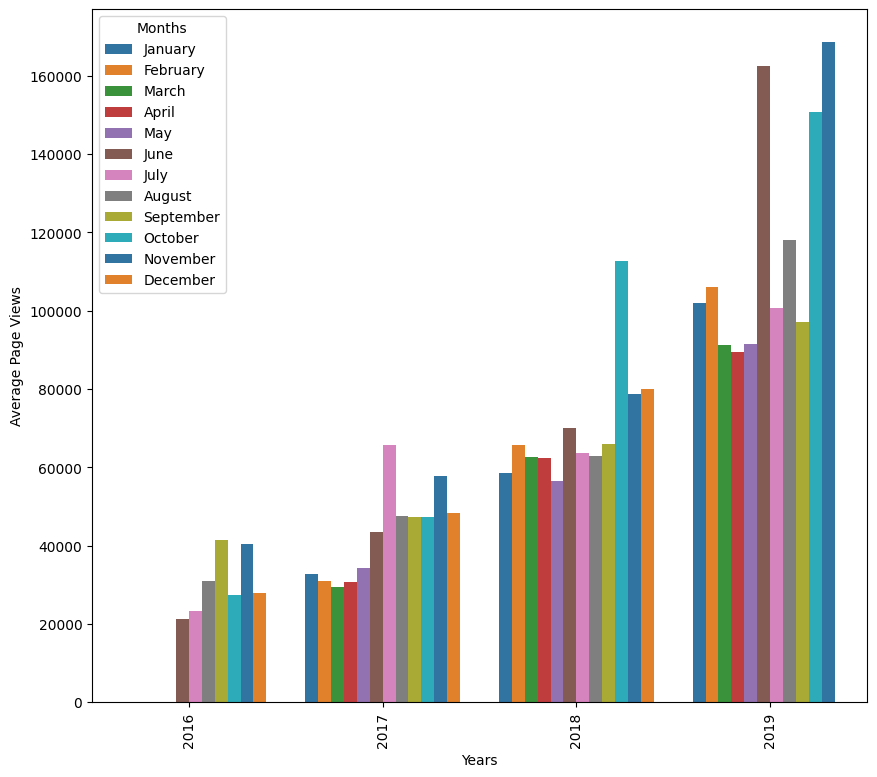

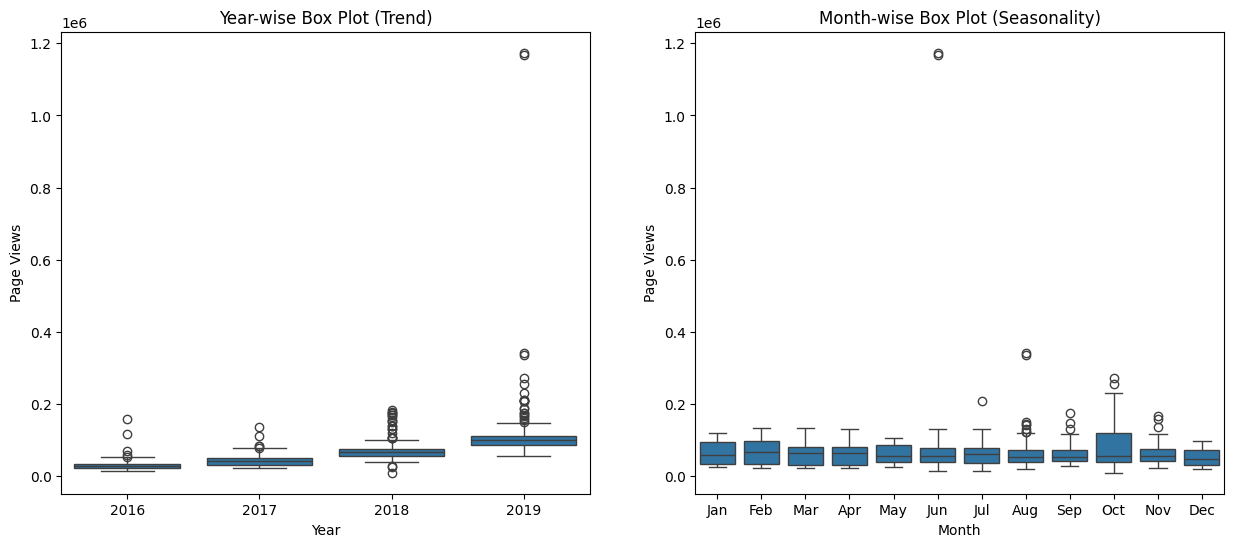

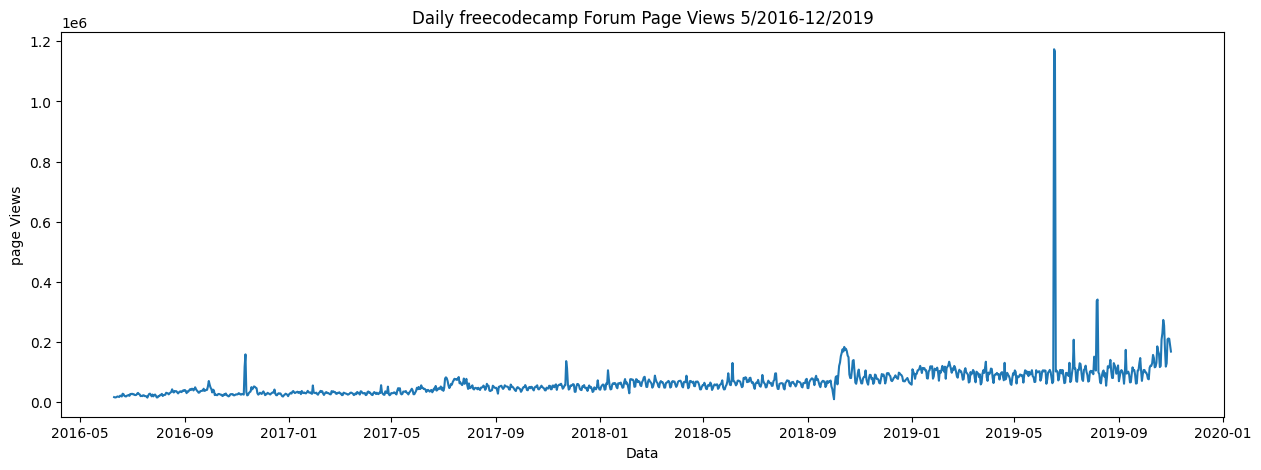

In [174]:
draw_bar_plot()
draw_box_plot()
draw_line_plot()